# Q1. RK4

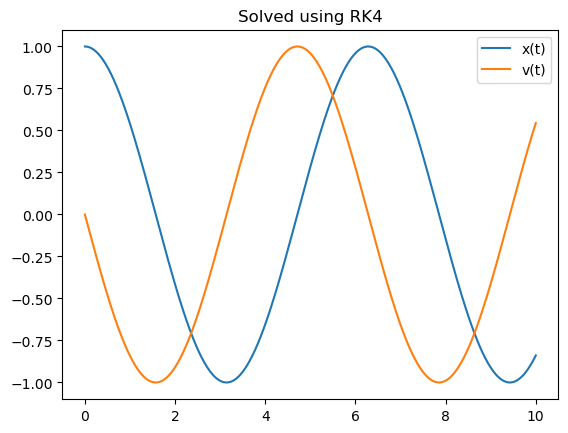

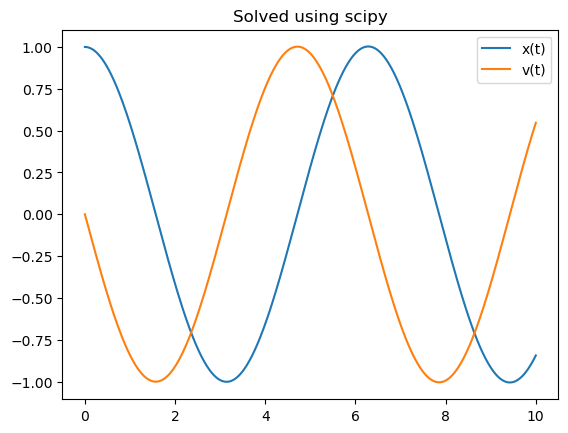

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def func(t, x):
    dxdt = x[1]
    dvdt = -x[0]
    #print(f't={t}, x={x}, returning [{dxdt}, {dvdt}]')
    return [dxdt, dvdt]

def solve_rk4(f, initial, t_eval):
    x = initial[0]
    v = initial[1]
    t = t_eval[0]
    ys = [[x],[v]]
    for next_t in t_eval[1:]:
        h = next_t - t
        kx1, kv1 = [h*r for r in f(t, [x, v])]
        kx2, kv2 = [h*r for r in f(t+h/2, [x+kx1/2, v+kv1/2])]
        kx3, kv3 = [h*r for r in f(t+h/2, [x+kx2/2, v+kv2/2])]
        kx4, kv4 = [h*r for r in f(t+h, [x+kx3, v+kv3])]
        x += (1/6)*(kx1+2*(kx2+kx3)+kx4)
        v += (1/6)*(kv1+2*(kv2+kv3)+kv4)
        ys[0].append(x)
        ys[1].append(v)
        t = next_t
        
    return ys

t = np.linspace(0,10,500)
#print(t)
rk4sol = solve_rk4(func, [1, 0], t_eval=t)
plt.plot(t, rk4sol[0], label='x(t)')#, marker='.')
plt.plot(t, rk4sol[1], label='v(t)')#, marker='.')
#plt.yscale('log')
plt.title('Solved using RK4')
plt.legend()
plt.show()

sol = solve_ivp(func, [0, 50], [1, 0], t_eval=t, method='LSODA')
plt.plot(sol.t, sol.y[0], label='x(t)')#, marker='.')
plt.plot(sol.t, sol.y[1], label='v(t)')#, marker='.')
#plt.yscale('log')
plt.title('Solved using scipy')
plt.legend()
plt.show()




# Q2. Ising Model

In [3]:
import itertools
def ising_energy(state, J):
    sum = 0
    for i in range(len(state) - 1):
        sum += state[i]*state[i+1]
    return -J*sum

# test
N=6
J=1
state1=[1,1,1,1,1,1]
energy1 = ising_energy(state1, J)
state2=[1,-1,1,-1,1,-1]
energy2 = ising_energy(state2, J)
print(f'Ising energy for state={state1}={energy1}\nfor state={state2}={energy2}')

states = list(itertools.product([-1, 1], repeat=N))
print(f'Total {len(states)} states generated for N={N}')
min_energy = 10
min_energy_state = None
for state in states:
    energy = ising_energy(state, J)
    if energy < min_energy:
        min_energy = energy
        min_energy_state = state

print(f'Min energy state={min_energy_state}, energy={min_energy}')

Ising energy for state=[1, 1, 1, 1, 1, 1]=-5
for state=[1, -1, 1, -1, 1, -1]=5
Total 64 states generated for N=6
Min energy state=(-1, -1, -1, -1, -1, -1), energy=-5


# Q3. Ising Energy Hamiltonian

In [4]:
from scipy.linalg import kron, eigvals

paulix = np.array([[0,1],[1,0]])
pauliz = np.array([[1,0],[0,-1]])
identity = np.array([[1,0],[0,1]])

N=8
J=1
h=1/2
term1=None
for j in range(N-1):
    term_j = None
    for i in range(N):
        term_i = None
        if (i == j or i == j+1):
            term_i = paulix
        else:
            term_i = identity
        
        if term_j is None:
            term_j = term_i
        else:
            term_j = kron(term_j, term_i)
    if term1 is None: term1 = term_j
    else: term1 += term_j

term2 = None
for j in range(N):
    term_j = None
    for i in range(N):
        term_i = None
        if (i == j):
            term_i = pauliz
        else:
            term_i = identity
        
        if term_j is None:
            term_j = term_i
        else:
            term_j = kron(term_j, term_i)

    if term2 is None: term2 = term_j
    else: term2 += term_j

##
J,h = 1,1/2
H1 = J*term1+h*term2
print(H1)
eigvals1 = eigvals(H1)
realeigvals1 = [i.real for i in eigvals1]
#print(f'Eigenvalues of 1st Hamiltonian={eigvals1}')
print(f'Ground state={np.min(realeigvals1)}')

J,h = 0,1/2
H1 = J*term1+h*term2
eigvals1 = eigvals(H1)
realeigvals1 = [i.real for i in eigvals1]
#print(f'Eigenvalues of 1st Hamiltonian={eigvals1}')
print(f'Ground state={np.min(realeigvals1)}')

J,h = 1, 0
H2 = J*term1+h*term2
eigvals2 = eigvals(H2)
#print(f'Eigenvalues of 1st Hamiltonian={eigvals2}\nGround state={np.min(eigvals2)}')
realeigvals2 = [i.real for i in eigvals2]
#print(f'Eigenvalues of 1st Hamiltonian={eigvals1}')
print(f'Ground state={np.min(realeigvals2)}')


[[ 4.  0.  0. ...  0.  0.  0.]
 [ 0.  3.  1. ...  0.  0.  0.]
 [ 0.  1.  3. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -3.  1.  0.]
 [ 0.  0.  0. ...  1. -3.  0.]
 [ 0.  0.  0. ...  0.  0. -4.]]
Ground state=-7.640592553590088
Ground state=-4.0
Ground state=-7.000000000000009


# Challenge: FFT

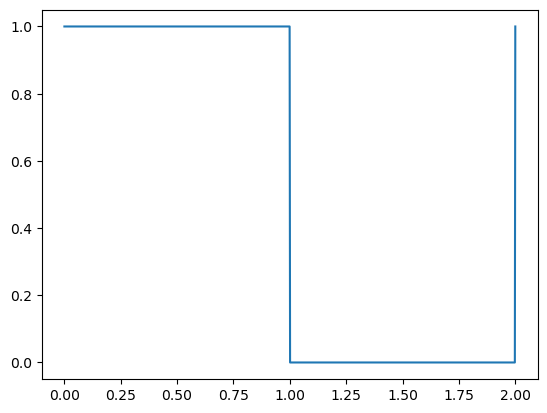

Top 5 frequencies
k=0, X=(501+0j)
k=1, X=(1.999980260856152-318.3025558415848j)
k=2, X=(0.9999210442037962+0.012566039883356231j)
k=3, X=(1.9998223523808238-106.08130534362388j)
k=4, X=(0.9996841892832492+0.02513009544334929j)
[(501+0j), (1.999980260856152-318.3025558415848j), (0.9999210442037962+0.012566039883356231j), (1.9998223523808238-106.08130534362388j), (0.9996841892832492+0.02513009544334929j), (1.9995065603657725-63.62533040379345j), (0.9992894726405934+0.03769018266991994j), (1.9990329346781524-45.421542145874824j), (0.9987369566060255+0.050244318179778334j), (1.9984015501089627-35.30182131674955j)]
[501.        -0.00000000e+00j   1.99998026-3.18302556e+02j
   0.99992104+1.25660399e-02j   1.99982235-1.06081305e+02j
   0.99968419+2.51300954e-02j   1.99950656-6.36253304e+01j
   0.99928947+3.76901827e-02j   1.99903293-4.54215421e+01j
   0.99873696+5.02443182e-02j   1.99840155-3.53018213e+01j]


In [5]:
def square_wave(t, A=1, T=2):
    if int(t) % 2 == 0:
        return A
    else: return 0

N=1000
T=2
A=1
t = np.linspace(0,2, N)
fn = [square_wave(x, A, T) for x in t]
plt.plot(t, fn)
plt.show()

ks = range(0,N,1)

X = []
for k in ks:
    Xk = 0
    for j in range(N):
        Xk += np.exp(-2j*np.pi*k*j/N)*fn[j]
    X.append(Xk)

top_frequencies = np.argsort(X)
print('Top 5 frequencies')
for i in range(5):
    print(f'k={ks[i]}, X={X[i]}')

print(X[:10])
from scipy.fft import fft
yf = fft(fn)
print(yf[:10])
